In [283]:
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image
import imageio

In [339]:
data_filename = 'day11_dumbo.txt'
with open(data_filename) as datafile:
    data_orig = [l.strip() for l in datafile.readlines()]

In [340]:
data_orig = np.array([[d for d in row] for row in data_orig]).astype(int)
data_orig

array([[1, 4, 4, 3, 6, 6, 8, 6, 4, 6],
       [7, 6, 8, 6, 7, 3, 5, 7, 1, 6],
       [4, 2, 6, 1, 5, 7, 6, 2, 3, 1],
       [3, 3, 6, 1, 2, 5, 8, 6, 5, 4],
       [4, 8, 5, 2, 5, 3, 2, 6, 1, 1],
       [5, 5, 8, 7, 1, 1, 3, 7, 3, 2],
       [1, 2, 2, 4, 4, 2, 6, 7, 5, 7],
       [5, 1, 5, 5, 5, 6, 5, 1, 3, 3],
       [6, 4, 8, 8, 3, 7, 7, 8, 6, 2],
       [8, 2, 6, 7, 8, 3, 3, 8, 1, 1]])

# Part 1

In [341]:
def find_neighbours(x, y):
    result = []
    for x_new in range(x-1, x+2):
        if x_new >= 0 and x_new < 10:
            for y_new in range(y-1, y+2):
                if y_new >= 0 and y_new < 10:
                    result.append((x_new, y_new))
    result.remove((x, y))
    return result

In [356]:
find_neighbours(5,5)

[(4, 4), (4, 5), (4, 6), (5, 4), (5, 6), (6, 4), (6, 5), (6, 6)]

In [342]:
data = data_orig.copy()
data

array([[1, 4, 4, 3, 6, 6, 8, 6, 4, 6],
       [7, 6, 8, 6, 7, 3, 5, 7, 1, 6],
       [4, 2, 6, 1, 5, 7, 6, 2, 3, 1],
       [3, 3, 6, 1, 2, 5, 8, 6, 5, 4],
       [4, 8, 5, 2, 5, 3, 2, 6, 1, 1],
       [5, 5, 8, 7, 1, 1, 3, 7, 3, 2],
       [1, 2, 2, 4, 4, 2, 6, 7, 5, 7],
       [5, 1, 5, 5, 5, 6, 5, 1, 3, 3],
       [6, 4, 8, 8, 3, 7, 7, 8, 6, 2],
       [8, 2, 6, 7, 8, 3, 3, 8, 1, 1]])

In [349]:
arr = data > 5
arr

array([[False, False, False, False,  True,  True,  True,  True, False,
         True],
       [ True,  True,  True,  True,  True, False, False,  True, False,
         True],
       [False, False,  True, False, False,  True,  True, False, False,
        False],
       [False, False,  True, False, False, False,  True,  True, False,
        False],
       [False,  True, False, False, False, False, False,  True, False,
        False],
       [False, False,  True,  True, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False,  True,  True, False,
         True],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [ True, False,  True,  True, False,  True,  True,  True,  True,
        False],
       [ True, False,  True,  True,  True, False, False,  True, False,
        False]])

In [301]:
def step(data):
    data = data + 1
    flashed = np.zeros_like(data).astype(bool)
    to_flash = ((data > 9) & ~flashed)
    
    while to_flash.sum() > 0:
        # Find all indices of flashing points
        coords = np.where(to_flash)
        
        # Add 1 to all neighbours
        for x, y in zip(*coords):
            neighbours = find_neighbours(x, y)
            for xn, yn in neighbours:
                data[xn, yn] += 1
                
        # Mark them as flashed
        flashed[coords] = True
        to_flash = ((data > 9) & ~flashed)
        #print(to_flash.sum(), 'to flash')
        
    # Reset all flashed cells to 0
    data[flashed] = 0
    
    return data, flashed

In [302]:
cm = plt.get_cmap('viridis')
def save_img(data, i):
    img_scale = np.kron(data, np.ones((20, 20)))
    img = Image.fromarray((cm(img_scale)[:, :, :3] * 255).astype(np.uint8))
    img.save(f'animation_day11/{i}.png')

1743


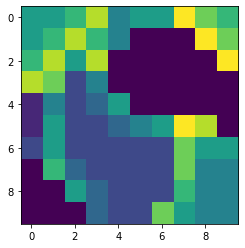

In [303]:
data = data_orig.copy()
total_flashes = 0

for i in range(100):
    data, flashed = step(data)
    total_flashes += flashed.sum()
    #save_img(flashed, i)
print(total_flashes)
plt.imshow(data)

# Part 2

364


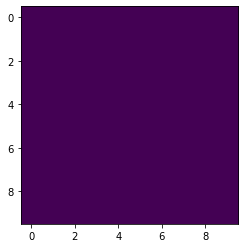

In [309]:
data = data_orig.copy()

for i in range(10_000):
    data, flashed = step(data)
    save_img(flashed, i)
    if flashed.all():
        print(i + 1)
        break
        
plt.imshow(flashed)

# Make a gif

In [310]:
import os

In [311]:
fnames = os.listdir('animation_day11/')
images = []
for filename in fnames:
    image = imageio.imread(f'animation_day11/{filename}')
    images.append(image)
imageio.mimsave('animation_day11.gif', images, fps=5)

### Result
![SegmentLocal](animation_day11.gif "segment")